# Keithley 2612B SMU instrument control and EXFO optical test system IQ-203 with PyVISA

## Get the instrument address

Import the VISA module, create a ressource manager and check available ressources.

In [1]:
import visa
rm = visa.ResourceManager()
rm.list_resources()

ModuleNotFoundError: No module named 'visa'

The traget instrument is « GPIB0::26::INSTR ». To know the instrument address, on the Keithley 2612B, go to MENU/GPIB/ADDRESS and the instrument address is given by ADDR = « # ».

# Switcher Control

## Connecting the instrument

In [5]:
inst4 = rm.open_resource('GPIB0::3::INSTR') # Keithley Instruments Inc.
# Query = write + read
print(inst4.query('*IDN?'))

In [6]:
import numpy as np
import time

# Loop for voltages from 0.01 V to 1 V.

for v in range(1000):
    inst4.write("OPEN 101")
    #time.sleep(0.0001)
    inst4.write("ClOSE 101")

KeyboardInterrupt: 

In [ ]:
inst4.write("OPEN 101")

## Connecting the instrument

In [168]:
# open the instrment
# instrument object
inst = rm.open_resource('GPIB0::25::INSTR') # Keithley Instruments Inc.
# Query = write + read
print(inst.query('*IDN?'))

inst1 = rm.open_resource('GPIB0::11::INSTR') # EXFO Electro-Optical Engineering Inc.
# Query = write + read
print(inst1.query('*IDN?'))
print(inst1.query("INST:CAT?"))# This query returns a list of strings identifying available modules
print(inst1.query("INST:CAT:FULL?"))# This query returns the available modules with their address number, model number, and physical locations


inst2 = rm.open_resource('GPIB0::10::INSTR') # laser photonetics.
print(inst2.query('*IDN?'))

inst3 = rm.open_resource('GPIB0::5::INSTR') # fliter.
#print(inst3.query('*IDN?'))

Keithley Instruments Inc., Model 2612B, 4308273, 3.2.2

EXFO Electro-Optical Engineering Inc.,IQ-200 OTS v1.00,0,0

 IQ-1643-PL-S (0-A),IQ-3100B (0-B),

 0 - IQ-1643-PL-S (0-A), 1 - IQ-3100B (0-B), 

XXXX,XXXX,XXXX,V2.01



# Opening the software for optical test system

In [3]:
# Open the software application that is required to operate a specific module
inst1.write("INST:STAT 1,0") # INST:STAT number1,number2  number1: 1 "on",0 "off" number2: address

(15, <StatusCode.success: 0>)

## Buffer Initialisation for keithley

### Channel A

In [126]:
# Select ASCII data format.
inst.write("format.data = format.ASCII") # format.ASCII, format.REAL32, format.REAL64
# Clear buffer 1.
inst.write("smua.nvbuffer1.clear()")
# Enable append buffer mode.
inst.write("smua.nvbuffer1.appendmode = 1")
# Enable source value storage.
inst.write("smua.nvbuffer1.collectsourcevalues = 1")
# Set count to 1.
inst.write("smua.measure.count = 1")

(24, <StatusCode.success: 0>)

### Channel B

In [127]:
# Select ASCII data format.
inst.write("format.data = format.ASCII") # format.ASCII, format.REAL32, format.REAL64
# Clear buffer 2.
inst.write("smub.nvbuffer2.clear()")
# Enable append buffer mode.
inst.write("smub.nvbuffer2.appendmode = 1")
# Enable source value storage.
inst.write("smub.nvbuffer2.collectsourcevalues = 1")
# Set count to 1.
inst.write("smub.measure.count = 1")

(24, <StatusCode.success: 0>)

##  Seting the limmit current

In [128]:
import numpy as np
import time
# Select source voltage function for channel a.
inst.write("smua.source.func = smua.OUTPUT_DCVOLTS")
inst.write("smua.source.limiti = 0.1")# very important
inst.write("smua.source.rangev = 200")
# Select source voltage function for channel b.
inst.write("smub.source.func = smub.OUTPUT_DCVOLTS")
inst.write("smub.source.limiti = 0.1")# very important
inst.write("smub.source.rangev = 200")
# Set bias voltage to 0 V for channel a.
inst.write("smua.source.levelv = 0")
# Set bias voltage to 0 V for channel b.
inst.write("smub.source.levelv = 0")
# Turn on output for channel a.
inst.write("smua.source.output = smua.OUTPUT_ON")
# Turn on output for channel b.
inst.write("smub.source.output = smub.OUTPUT_ON")

inst1.write("INST0:NSEL 1") #  number can be 1,2,3, or 4, meaning the selected channel
    #print(inst1.query("READ0:SCAL:POW:DC?"))
a1=inst1.query("READ0:SCAL:POW:DC?")   
    #print(x[v,4])
           
inst1.write("INST0:NSEL 2") #  number can be 1,2,3, or 4, meaning the selected channel   
a2=inst1.query("READ0:SCAL:POW:DC?")
    
    #print(x[v,5])
    
inst1.write("INST0:NSEL 3") #  number can be 1,2,3, or 4, meaning the selected channel    
a3=inst1.query("READ0:SCAL:POW:DC?")   
    
inst1.write("INST0:NSEL 4") #  number can be 1,2,3, or 4, meaning the selected channel
a4=inst1.query("READ0:SCAL:POW:DC?")


In [217]:
# set the sample rate for pd
inst1.query("SENS0:FREQ:CAT?")
inst1.write("SENS0:FREQ 64")
inst1.query("SENS0:FREQ?")


'64.0\n'

# Appling the sweep voltage

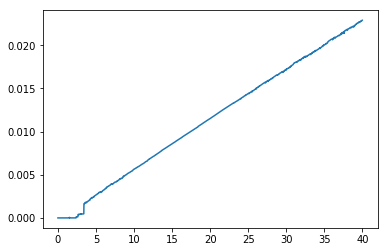

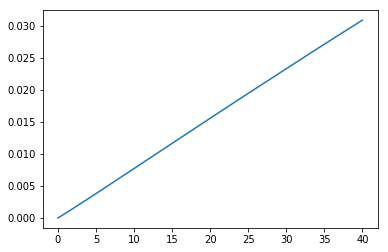

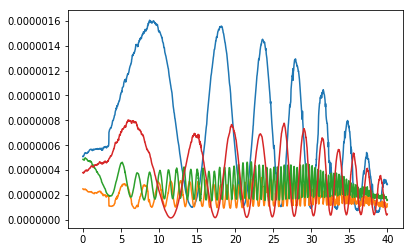

In [129]:
def isfloat(value1,value2):
    try:
        float(value1)
        return float(value1)
    except ValueError:
        return value2
    
import numpy as np
import time

# Loop for voltages from 0.01 V to 1 V.
x = np.empty([2000,8])
for v in range(2000):
    # Set source voltage.
    inst.write("smua.source.levelv = " + str(v) +" * 0.02")
    inst.write("smub.source.levelv = " + str(v) +" * 0.02")
    time.sleep(0.5)
     # Turn on output for channel a.
    inst.write("smua.source.output = smua.OUTPUT_ON")
    # Turn on output for channel b.
    inst.write("smub.source.output = smub.OUTPUT_ON")
    
    time.sleep(0.1)
    # Measure current of channel A and store in nvbuffer1.
    inst.write("smua.measure.i(smua.nvbuffer1)")
    # Measure current of channel B and store in nvbuffer1.
    inst.write("smub.measure.i(smub.nvbuffer2)")
    a11=0;
    a12=0;
    a13=0;
    a14=0;
    
    for w in range(5):   
        inst1.write("INST0:NSEL 1") #  number can be 1,2,3, or 4, meaning the selected channel
    #print(inst1.query("READ0:SCAL:POW:DC?"))
        x1=inst1.query("READ0:SCAL:POW:DC?")
        inst1.write("INST0:NSEL 2") #  number can be 1,2,3, or 4, meaning the selected channel   
        x2=inst1.query("READ0:SCAL:POW:DC?")
        inst1.write("INST0:NSEL 3") #  number can be 1,2,3, or 4, meaning the selected channel    
        x3=inst1.query("READ0:SCAL:POW:DC?")
        inst1.write("INST0:NSEL 4") #  number can be 1,2,3, or 4, meaning the selected channel
        x4=inst1.query("READ0:SCAL:POW:DC?")
        x1=isfloat(x1,a1)
        a1=x1
        a11=a11+10**(x1/10)
        x2=isfloat(x2,a2)
        a2=x2
        a12=a12+10**(x2/10)
        x3=isfloat(x3,a3)
        a3=x3
        a13=a13+10**(x3/10)
        x4=isfloat(x4,a4)
        a4=x4
        a14=a14+10**(x4/10)
    
    # Turn off output.
    inst.write("smua.source.output = smua.OUTPUT_OFF")
    inst.write("smub.source.output = smua.OUTPUT_OFF")
    
    x[v,4]=a11/5
    #print(x[v,4])
           
    x[v,5]=a12/5
    #print(x[v,5])
    
    x[v,6]=a13/5
    
    x[v,7]=a14/5
    
    #time.sleep(0.6)
    
# Turn off output.
inst.write("smua.source.output = smua.OUTPUT_OFF")
inst.write("smub.source.output = smua.OUTPUT_OFF")
# Set bias voltage to 0 V for channel a.
inst.write("smua.source.levelv = 0.0")
# Set bias voltage to 0 V for channel b.
inst.write("smub.source.levelv = 0.0")

# Output readings 1 to 100.
Ia = inst.query_ascii_values("printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.readings)",delay = 2)
# Output source values 1 to 100.
Va = inst.query_ascii_values("printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.sourcevalues)",delay = 2)
#print(I,V)
# Output readings 1 to 100.
Ib = inst.query_ascii_values("printbuffer(1, smub.nvbuffer2.n, smub.nvbuffer2.readings)",delay = 2)
# Output source values 1 to 100.
Vb = inst.query_ascii_values("printbuffer(1, smub.nvbuffer2.n, smub.nvbuffer2.sourcevalues)",delay = 2)
import matplotlib.pyplot as plt
x[:,0]=Va
x[:,1]=Ia
x[:,2]=Vb
x[:,3]=Ib
plt.plot(Va, Ia)
plt.show()

plt.plot(Vb, Ib)
plt.show()

import matplotlib.pyplot as plt

#print(Vin,np.squeeze(x))

plt.plot(Vb, x[:,4:8]) # blue is 1, yellow is 2
plt.show()
np.savetxt('20180912_H_30_Q_45_Wavelength_broadband_BDC_sample_64_a2_b3.txt', x)
#np.savetxt('20180827_9_10_11_11_vb_voltage_Va.txt', Va)
#np.savetxt('20180827_9_10_11_11_vb_voltage_Vb.txt', Vb)

In [106]:
import math
bb=math.log10(10)

# Plotting the figure for source

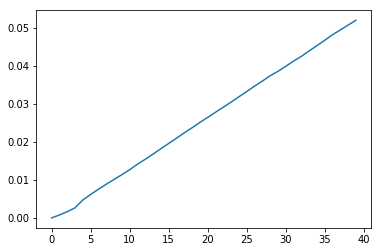

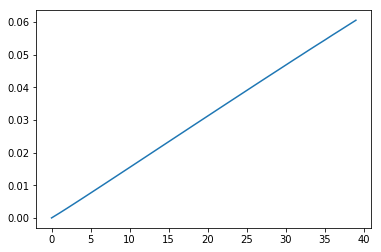

In [44]:
# Output readings 1 to 100.
Ia = inst.query_ascii_values("printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.readings)",delay = 2)
# Output source values 1 to 100.
Va = inst.query_ascii_values("printbuffer(1, smua.nvbuffer1.n, smua.nvbuffer1.sourcevalues)",delay = 2)
#print(I,V)
# Output readings 1 to 100.
Ib = inst.query_ascii_values("printbuffer(1, smub.nvbuffer2.n, smub.nvbuffer2.readings)",delay = 2)
# Output source values 1 to 100.
Vb = inst.query_ascii_values("printbuffer(1, smub.nvbuffer2.n, smub.nvbuffer2.sourcevalues)",delay = 2)
import matplotlib.pyplot as plt
x[:,0]=Va
x[:,1]=Ia
x[:,2]=Vb
x[:,3]=Ib
plt.plot(Va, Ia)
plt.show()

plt.plot(Vb, Ib)
plt.show()

# Plotting the figure for PD

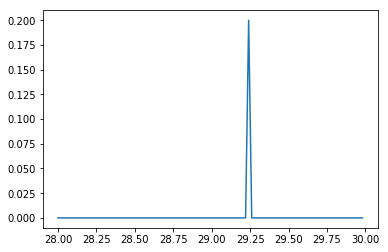

In [95]:
import matplotlib.pyplot as plt
Vin = np.linspace(0,3999,4000)
#print(Vin,np.squeeze(x))


plt.plot(Vb[1400:1500], x[1400:1500,5]) # blue is 1, yellow is 2
plt.show()
#np.savetxt('20180905_H_0_Q_0_Wavelength_1550_BDC_1.txt', x)
#np.savetxt('20180827_9_10_11_11_vb_voltage_Va.txt', Va)
#np.savetxt('20180827_9_10_11_11_vb_voltage_Vb.txt', Vb)

# Appling voltage channel A and B at the same time

In [202]:
inst.write("smua.source.output = smua.OUTPUT_ON")
inst.write("smua.source.levelv = 35")
inst.write("smub.source.output = smub.OUTPUT_ON")
inst.write("smub.source.levelv = 35")

(25, <StatusCode.success: 0>)

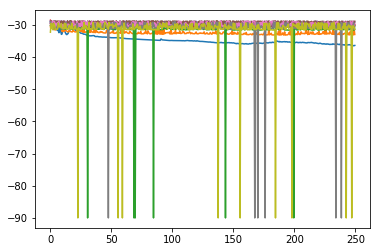

In [207]:
def isfloat2(value1):
    try:
        float(value1)
        return float(value1)
    except ValueError:
        return -90
    
import numpy as np
import time

#inst2.write("L = 1500.00")
#inst2.query("ENABLE")
#time.sleep(4)
inst.write("smua.source.output = smua.OUTPUT_ON")
inst.write("smua.source.levelv = 50")
inst.write("smub.source.output = smub.OUTPUT_ON")
inst.write("smub.source.levelv = 50")

kk=10

# Loop for voltages from 0.01 V to 1 V.
x = np.empty([500,kk+1])
for t in range(kk):
    for w in range(500):
    # Set wavelength.
   # inst2.write("L = " + str(w*0.2 + 1500.000))
    #inst2.write("P = 1")
        time.sleep(t*0.2)
    
        inst.write("smua.source.output = smua.OUTPUT_ON")
        inst.write("smub.source.output = smub.OUTPUT_ON")
    
        time.sleep(0.1)
    
      
    #print(inst2.query("L?"))
    #string1 = inst2.query("L?")
    #string2 = string1.strip( 'L=' )
    #print(string2)
    #string3 = string2.strip( '\n' )
    #string = string3.strip("''")
    #print(float(string))
    # measure wavelength
        x[w,0]= w*0.5  #inst2.query("L?")
    # measure intensity of light
        inst1.write("INST0:NSEL 1") #  number can be 1,2,3, or 4, meaning the selected channel
    # print(inst1.query("READ0:SCAL:POW:DC?"))
        x1=inst1.query("READ0:SCAL:POW:DC?")
        x[w,t+1]=isfloat2(x1)
    

        inst.write("smua.source.output = smua.OUTPUT_OFF")
        inst.write("smub.source.output = smua.OUTPUT_OFF")

        
    inst.write("smua.source.output = smua.OUTPUT_OFF")
    inst.write("smub.source.output = smua.OUTPUT_OFF")
    time.sleep(60)

# Turn off output.
inst.write("smua.source.output = smua.OUTPUT_OFF")
inst.write("smub.source.output = smua.OUTPUT_OFF")
    
plt.plot(x[:,0], x[:,1:kk])
plt.show()
np.savetxt('20180913_50V_GC_to_GC_time.txt', x)

In [203]:
# Turn off output.
inst.write("smua.source.output = smua.OUTPUT_OFF")
inst.write("smub.source.output = smua.OUTPUT_OFF")

(38, <StatusCode.success: 0>)

In [13]:
def isfloat(value1,value2):
    try:
        float(value1)
        return float(value1)
    except ValueError:
        return value2


x1="a-1"
x2="1"
print(isfloat(x1,x2))



1


#  Laser

In [211]:
inst2.write("L = 1550")
inst2.query("L?")
inst2.query("DISABLE")

'\n'

## Sweep the wavelength and read the value of PD

In [190]:
def isfloat2(value1):
    try:
        float(value1)
        return float(value1)
    except ValueError:
        return -90
   
    
import numpy as np
import time

inst2.write("L = 1500.00")
inst2.query("ENABLE")
time.sleep(4)

# Loop for voltages from 0.01 V to 1 V.
x = np.empty([400,5])
for w in range(400):
    # Set wavelength.
    inst2.write("L = " + str(w*0.2 + 1500.000))
    inst2.write("P = 1")
    
    time.sleep(0.5)  
    #print(inst2.query("L?"))
    #string1 = inst2.query("L?")
    #string2 = string1.strip( 'L=' )
    #print(string2)
    #string3 = string2.strip( '\n' )
    #string = string3.strip("''")
    #print(float(string))
    # measure wavelength
    x[w,0]= w*0.2 + 1500.000  #inst2.query("L?")
    # measure intensity of light
    inst1.write("INST0:NSEL 1") #  number can be 1,2,3, or 4, meaning the selected channel
    # print(inst1.query("READ0:SCAL:POW:DC?"))
    x1=inst1.query("READ0:SCAL:POW:DC?")
    x[w,1]=isfloat2(x1)
    
    inst1.write("INST0:NSEL 2") #  number can be 1,2,3, or 4, meaning the selected channel   
    x2=inst1.query("READ0:SCAL:POW:DC?")
    x[w,2]=isfloat2(x2)
    
    inst1.write("INST0:NSEL 3") #  number can be 1,2,3, or 4, meaning the selected channel    
    x3=inst1.query("READ0:SCAL:POW:DC?")
    x[w,3]=isfloat2(x3)
    
    inst1.write("INST0:NSEL 4") #  number can be 1,2,3, or 4, meaning the selected channel    
    x4=inst1.query("READ0:SCAL:POW:DC?")
    x[w,4]=isfloat2(x4)

# Turn off output.
inst.write("smua.source.output = smua.OUTPUT_OFF")
inst.write("smub.source.output = smua.OUTPUT_OFF")
    
plt.plot(x[:,0], x[:,1])
plt.show()
np.savetxt('20180913_41V_GC_to_GC.txt', x)



In [210]:
# str = "L = 1509.0"
# print(str)

# x = float(str.strip( 'L = ' ))
#  print(x)
inst3.write("OUTPUT 05;wvl " + str(1550) + " nm")

(23, <StatusCode.success: 0>)

# Plotting the figure for PD as a function with wavelength

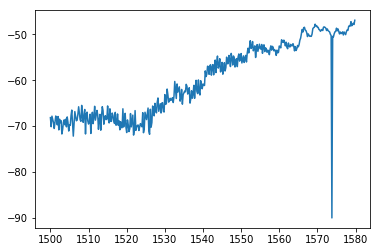

In [191]:
import matplotlib.pyplot as plt
#Vin = np.linspace(0,199,200)
#print(Vin,np.squeeze(x))

plt.plot(x[:,0], x[:,1])
plt.show()
np.savetxt('20180913_42V_GC_to_GC.txt', x)

# DS Uniphase Tb9 Optical Grating Filter

## Sweep the wavelength

In [132]:
def isfloat2(value1):
    try:
        float(value1)
        return float(value1)
    except ValueError:
        return -90
       
import numpy as np
import time

for k in range(4):
    inst3.write("OUTPUT 05;wvl 1520 nm")
    time.sleep(4)
    x = np.empty([110,5])
    for w in range(110):
        
    # Set wavelength.
        inst3.write("OUTPUT 05;wvl " + str(w*0.5 + 1520.000) + " nm")
        x[w,0]= w*0.5 + 1520.000  #inst2.query("L?")
        time.sleep(1)  
    #print(inst2.query("L?"))
    #string1 = inst2.query("L?")
    #string2 = string1.strip( 'L=' )
    #print(string2)
    #string3 = string2.strip( '\n' )
    #string = string3.strip("''")
    #print(float(string))
    # measure wavelength
        a1=0
        a2=0
        a3=0
        a4=0
        for v in range(15):
    # measure intensity of light
            inst1.write("INST0:NSEL 1") #  number can be 1,2,3, or 4, meaning the selected channel
    # print(inst1.query("READ0:SCAL:POW:DC?"))
            x1=inst1.query("READ0:SCAL:POW:DC?")
            inst1.write("INST0:NSEL 2") #  number can be 1,2,3, or 4, meaning the selected channel   
            x2=inst1.query("READ0:SCAL:POW:DC?")
            inst1.write("INST0:NSEL 3") #  number can be 1,2,3, or 4, meaning the selected channel    
            x3=inst1.query("READ0:SCAL:POW:DC?")
            inst1.write("INST0:NSEL 4") #  number can be 1,2,3, or 4, meaning the selected channel    
            x4=inst1.query("READ0:SCAL:POW:DC?")
        
            x1=isfloat2(x1)
            a1=a1+10**(x1/10)
            x2=isfloat2(x2)
            a2=a2+10**(x2/10)
            x3=isfloat2(x3)
            a3=a3+10**(x3/10)
            x4=isfloat2(x4)
            a4=a4+10**(x4/10)
            time.sleep(0.03)
    

        x[w,1]=a4/15
        x[w,2]=a1/15    
        x[w,3]=a2/15     
        x[w,4]=a3/15

    np.savetxt('Spectrum_of_H_30_Q_45_Wavelength_broadband_rotate_heater_8V_DBC_SR_64_'+str(k)+'.txt', x)

## Plotting the figure for PD as a function with wavelength

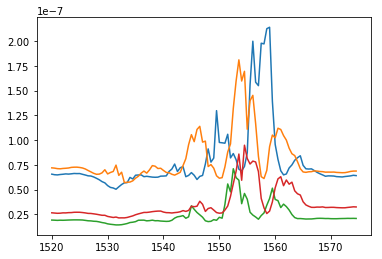

In [113]:
import matplotlib.pyplot as plt
#Vin = np.linspace(0,199,200)
#print(Vin,np.squeeze(x))
#x[:,0]=x[:,0]+20;
plt.plot(x[:,0], x[:,1:5])
plt.show()
#w=1
#aa='Spectrum_of_H_0_Q_0_Wavelength_broadband_DBC_SR_64_'+str(w)+'.txt'
#print(aa)
#np.savetxt('Spectrum_of_H_0_Q_0_Wavelength_broadband_DBC_SR_64_'+str(w)+'.txt', x)

In [52]:
inst3.write("OUTPUT 05;wvl 1556 nm")

(23, <StatusCode.success: 0>)